In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from load_data import load_data

In [2]:
df = load_data()

In [3]:
month_performence = df.groupby('order_month').agg(
    {
        'final_amount':['sum', 'mean'],
        'order_id':['count']
    }
)
month_performence.columns = ['total_revenue', 'avg_revenue', 'total_orders']
month_performence

,total_revenue,avg_revenue,total_orders
order_month,,,
1,30989.2730,322.804927,96
2,19216.0685,286.806993,67
3,24996.2060,304.831780,82
4,29611.4575,340.361580,87
5,26700.8620,300.009685,89
6,25334.9925,308.963323,82
7,28243.5225,317.342949,89
8,24777.1875,334.826858,74
9,21264.5210,279.796329,76


<Axes: xlabel='order_month', ylabel='total_revenue'>

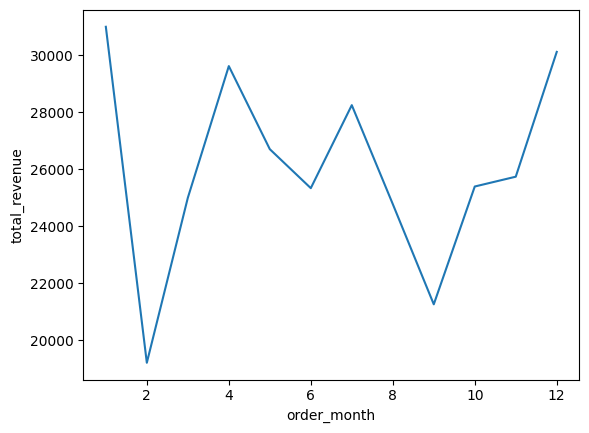

In [ ]:
# line plot showing monthly revenue trend
sns.lineplot(data=month_performence, x=month_performence.index, y=month_performence.total_revenue)

<Axes: xlabel='order_month', ylabel='total_orders'>

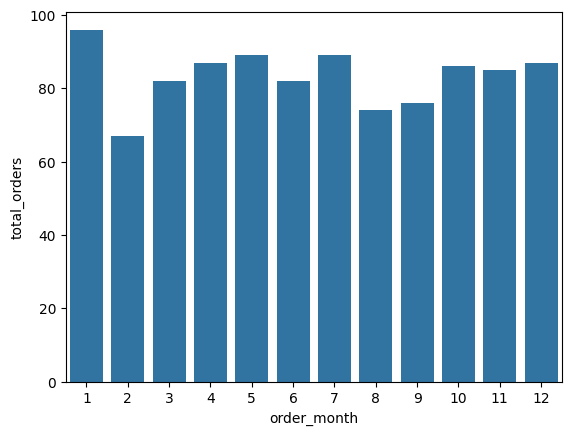

In [ ]:
# bar chart showing monthly order count
sns.barplot(data=month_performence, x=month_performence.index, y=month_performence.total_orders)

In [ ]:
# Identify the best performing month by revenue
best_performing_month = month_performence.sort_values(by='total_revenue', ascending=False).head(1)
best_performing_month

,total_revenue,avg_revenue,total_orders
order_month,,,
1,30989.273,322.804927,96


In [ ]:
# Identify the month with most orders
most_order_month = month_performence.sort_values(by='total_orders', ascending=False).head(1)
most_order_month


,total_revenue,avg_revenue,total_orders
order_month,,,
1,30989.273,322.804927,96


In [ ]:
# Calculate quarter-over-quarter growth rates
month_performence['growth_rate'] = (month_performence['total_revenue'].pct_change() * 100)
month_performence['growth_rate'] = month_performence['growth_rate'].apply(lambda x: f"+{x:.1f}%" if x > 0 else f"{x:.1f}%" if pd.notna(x) else "N/A")

month_performence

,total_revenue,avg_revenue,total_orders,growth_rate
order_month,,,,
1,30989.2730,322.804927,96,N/A
2,19216.0685,286.806993,67,-38.0%
3,24996.2060,304.831780,82,+30.1%
4,29611.4575,340.361580,87,+18.5%
5,26700.8620,300.009685,89,-9.8%
6,25334.9925,308.963323,82,-5.1%
7,28243.5225,317.342949,89,+11.5%
8,24777.1875,334.826858,74,-12.3%
9,21264.5210,279.796329,76,-14.2%
